In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
print('Datos de entrenamiento:',X_train.shape)
print('Datos de test:',X_test.shape)

Datos de entrenamiento: (60000, 28, 28)
Datos de test: (10000, 28, 28)


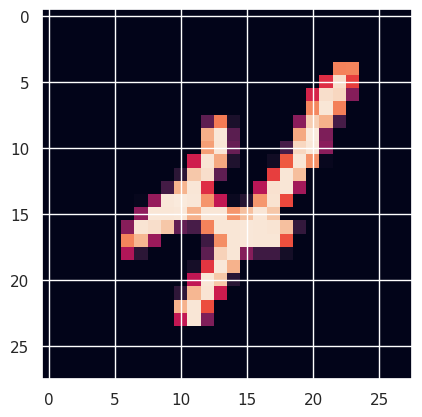

In [ ]:
plt.imshow(X_train[9])

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

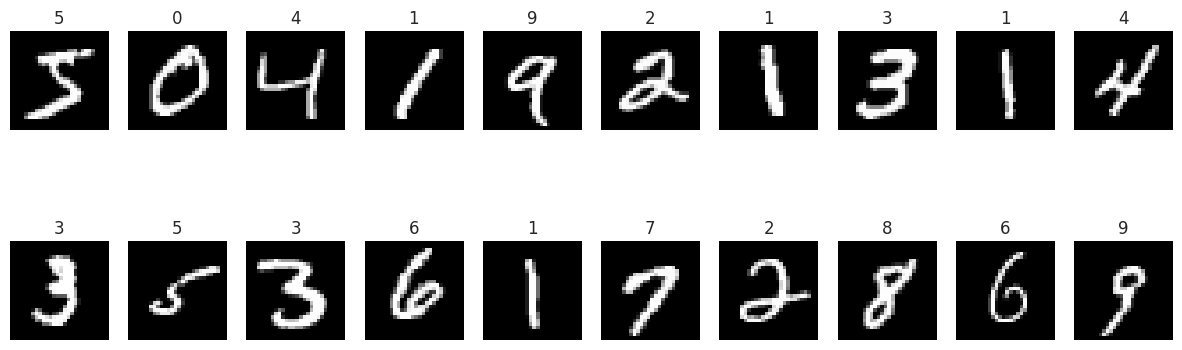

In [ ]:
fig,ax=plt.subplots(2,10,figsize=(15,5))
for i,ax in enumerate(ax.flat):
  ax.imshow(X_train[i],cmap='gray')
  ax.set_axis_off()
  ax.set_title(y_train[i])

In [ ]:
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(6,kernel_size=5,strides=1,padding='valid',activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)),
                               keras.layers.MaxPool2D(pool_size=2, strides=2),
                               keras.layers.Conv2D(16,kernel_size=5,strides=1,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.MaxPool2D(pool_size=2, strides=2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.Dense(84,activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.Dense(10,activation='softmax')
                               ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,802 (354.70 KB)

 Trainable params: 90,802 (354.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile?

El optimizador de Adam (Adaptive Moment Estimation) combina las ventajas de los algoritmos RMSProp y Momentum para mejorar el proceso de aprendizaje de un modelo. Al igual que Momentum, Adam utiliza una estimación del momento y de la magnitud de los gradientes anteriores para actualizar los parámetros del modelo en cada iteración. Sin embargo, en lugar de utilizar una tasa de aprendizaje constante para todos los parámetros, Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente. Esto permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento, lo que puede llevar a una mayor precisión de la predicción en comparación con otros métodos de optimización.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8832 - loss: 0.3796 - val_accuracy: 0.9687 - val_loss: 0.0968
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9783 - loss: 0.0683 - val_accuracy: 0.9803 - val_loss: 0.0649
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0451 - val_accuracy: 0.9798 - val_loss: 0.0668
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9836 - val_loss: 0.0559
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9920 - loss: 0.0246 - val_accuracy: 0.9851 - val_loss: 0.0525
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9927 - loss: 0.0206 - val_accuracy: 0.9842 - val_loss: 0.0565
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9944 - loss: 0.0156 - val_accuracy: 0.9804 - val_loss: 0.0783
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0149 

- Loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de entrenamiento. Es una función que se quiere minimizar durante el entrenamiento. Un valor bajo de loss indica que el modelo se ajusta bien a los datos de entrenamiento.
- Accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de entrenamiento. Es una métrica que se quiere maximizar durante el entrenamiento. Un valor alto de accuracy indica que el modelo clasifica bien los datos de entrenamiento.
- Val_loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de validación. Los datos de validación son un subconjunto de los datos de entrenamiento que se reservan para evaluar el rendimiento del modelo durante el entrenamiento. Un valor bajo de val_loss indica que el modelo se generaliza bien a los datos de validación.
- Val_accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de validación. Un valor alto de val_accuracy indica que el modelo clasifica bien los datos de validación.

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0631


[0.04812037572264671, 0.9879000186920166]

In [ ]:
np.shape(X_test[0][0:28,0:28])

(28, 28, 1)

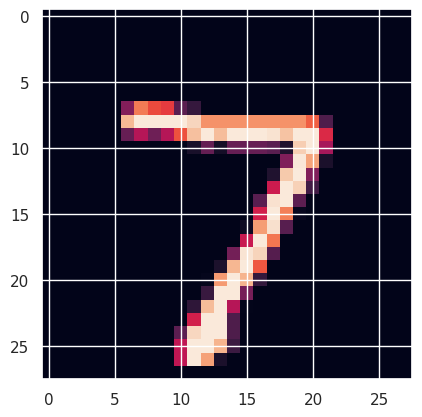

In [ ]:
plt.imshow(X_test[0].reshape(28,28))

In [ ]:
q=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
np.shape(q)

(10000, 10)

In [ ]:
np.max(q[0])

0.9999999

In [ ]:
q[0]

array([1.1413237e-11, 7.3935084e-08, 7.9791385e-10, 3.7134640e-09,
       4.4449337e-13, 6.0258160e-11, 6.4294063e-14, 9.9999988e-01,
       6.6721433e-12, 8.5484059e-10], dtype=float32)

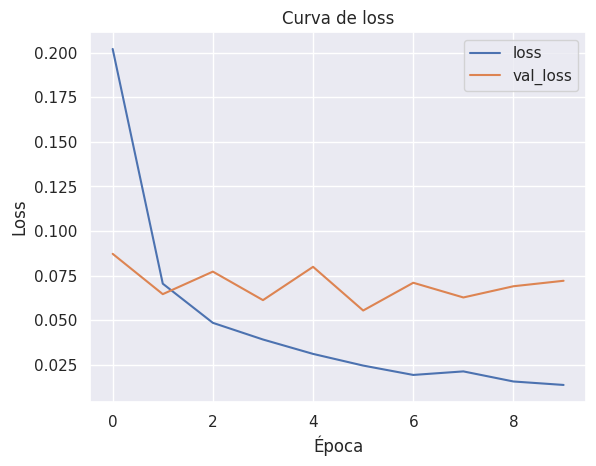

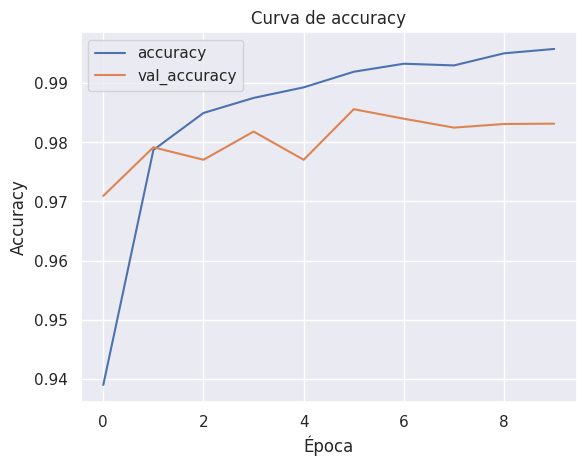

In [ ]:
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()

# Otra forma de solucionar el mismo problema

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 18s 6ms/step - loss: 0.2113 - accuracy: 0.9362 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0797 - val_accuracy: 0.9761
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0409 - accuracy: 0.9865 - val_loss: 0.0643 - val_accuracy: 0.9816
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0330 - accuracy: 0.9890 - val_loss: 0.0530 - val_accuracy: 0.9858
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0616 - val_accuracy

# Ejercicio usando Cifar100


CIFAR-100 es un conjunto de datos para la clasificación de imágenes, que contiene 60.000 imágenes de color de 32x32 píxeles, distribuidas en 100 clases diferentes. Cada clase tiene 600 imágenes, de las cuales 500 son para el conjunto de entrenamiento y 100 para el conjunto de prueba. Las 100 clases se agrupan en 20 superclases, cada una con 5 clases. Por ejemplo, la superclase de animales acuáticos contiene las clases de castor, delfín, nutria, foca y ballena. CIFAR-100 es una extensión del conjunto de datos CIFAR-10, que solo tiene 10 clases. CIFAR-100 fue desarrollado por el Instituto Canadiense de Investigación Avanzada (CIFAR) en 2009, y ofrece un desafío mayor para las tareas de aprendizaje automático y visión por computado

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras
#https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
test_label

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

(-0.5, 31.5, 31.5, -0.5)

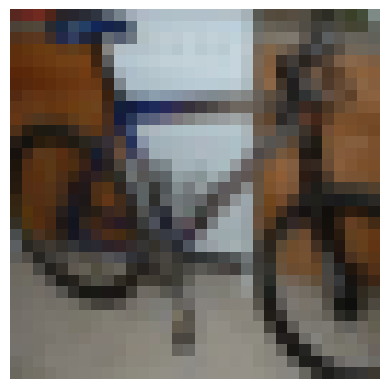

In [ ]:
plt.imshow(train_image[30])
plt.axis('off')

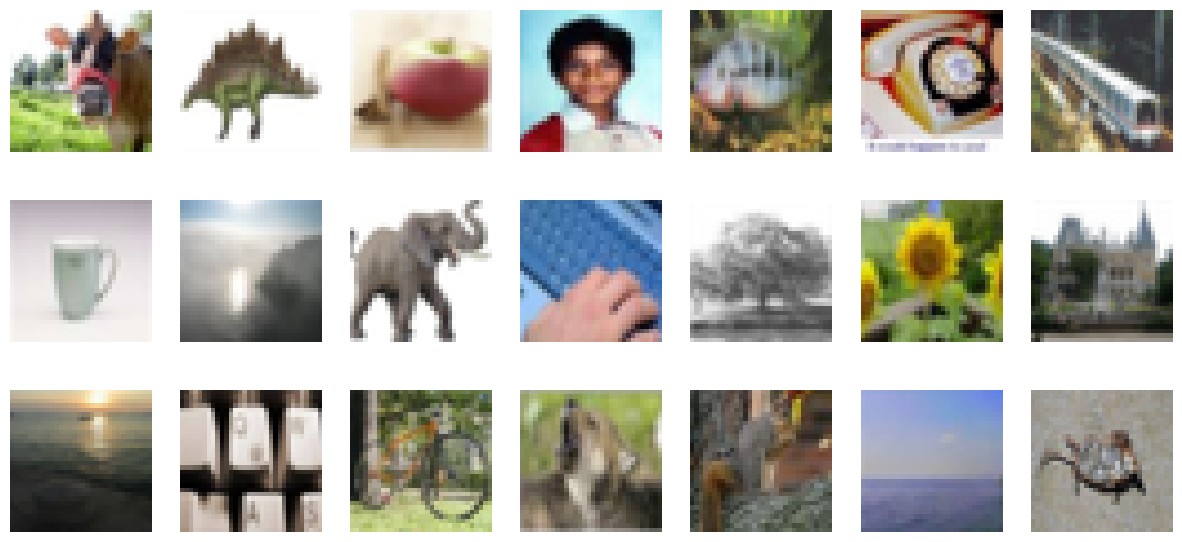

In [ ]:
fig , ax = plt.subplots(3,7, figsize=(15,7))
for i, ax in enumerate(ax.flat):
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

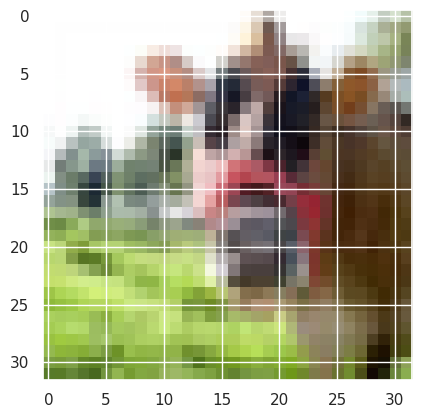

In [ ]:
plt.imshow(train_image[0])

In [ ]:
train_label[0]

array([19])

In [ ]:
train_image = train_image / 255.0
test_image = test_image / 255.0

- BatchNormalization es una técnica que se usa para acelerar y estabilizar el entrenamiento de las redes neuronales artificiales, mediante la normalización de las entradas de cada capa, re-centrando y re-escalando los datos.

  BatchNormalization se aplica justo antes de la función de activación de cada capa, y consiste en centrar y normalizar cada mini-lote con una media y una desviación estándar calculadas con los datos del mini-lote, y luego re-escalar y desplazar los datos de nuevo con parámetros aprendidos por la red durante el entrenamiento. Estos parámetros permiten que la red se adapte a la distribución óptima de las activaciones para cada capa. Además, al introducir cierto ruido en los datos, BatchNormalization actúa como una regularización y ayuda a reducir el sobreajuste.


- El dropout es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalizar a nuevos datos. El dropout consiste en eliminar aleatoriamente algunas neuronas de la red durante el entrenamiento, lo que hace que el modelo sea más robusto y menos dependiente de ciertas conexiones. El dropout se puede interpretar como una forma de promediar varios modelos más pequeños y diferentes, lo que mejora el rendimiento final.

  El dropout se aplica a cada capa de la red, especificando una probabilidad de mantener cada neurona activa. Por ejemplo, si se usa un dropout de 0.2, significa que el 20% de las neuronas se desactivarán en cada iteración del entrenamiento. El dropout solo se usa durante el entrenamiento, no durante la inferencia o la evaluación. El dropout se puede combinar con otras técnicas de regularización, como la normalización de pesos o la normalización por lotes.

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential([
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal',  padding='same', strides=(1,1)),
      keras.layers.Dropout(0.2),
      keras.layers.BatchNormalization(),

      keras.layers.MaxPool2D(pool_size=(2,2)),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(100, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 563,972 (2.15 MB)

 Trainable params: 563,076 (2.15 MB)

 Non-trainable params: 896 (3.50 KB)

El optimizador de NAdam (Nesterov-accelerated Adaptive Moment Estimation) es una variante de Adam que incorpora el método de Nesterov, que consiste en utilizar una predicción de la posición futura de los parámetros para calcular el gradiente, en lugar de la posición actual. Esto hace que el algoritmo sea más sensible a los cambios de dirección del gradiente y evite oscilaciones innecesarias. NAdam también modifica la forma de calcular el momento y la magnitud del gradiente, usando una media móvil exponencial sesgada hacia cero en lugar de una media móvil exponencial simple.

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

usemos early stopping en nuestro modelo



In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

El número de épocas que se necesita para entrenar una red neuronal depende de varios factores, como el tamaño de los datos, la complejidad del modelo, la función de pérdida, el algoritmo de optimización, la tasa de aprendizaje, etc. No hay una regla fija para elegir el número de épocas, pero se puede usar el criterio de parada temprana, que consiste en monitorear el error de validación y detener el entrenamiento cuando este empiece a aumentar, lo que indica un sobreajuste del modelo2.

In [ ]:
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.0769 - loss: 4.2830 - val_accuracy: 0.1910 - val_loss: 3.5077
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2338 - loss: 3.1290 - val_accuracy: 0.3176 - val_loss: 2.7380
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3305 - loss: 2.6005 - val_accuracy: 0.3734 - val_loss: 2.4495
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3983 - loss: 2.2860 - val_accuracy: 0.4198 - val_loss: 2.3281
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4511 - loss: 2.0421 - val_accuracy: 0.4296 - val_loss: 2.3678
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4917 - loss: 1.8539 - val_accuracy: 0.4451 - val_loss: 2.2136
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5244 - loss: 1.7003 - val_accuracy: 0.4656 - val_loss: 2.1762
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5634 - loss: 1.5495 - val_accur

In [ ]:
dddd

In [ ]:
model.evaluate(test_image, test_label, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4944 - loss: 2.0600


[2.0577473640441895, 0.4893999993801117]

--2024-12-12 12:39:46--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.05s   

2024-12-12 12:39:46 (3.06 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2024-12-12 12:39:46--  https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11612484 (11M) [image/jpeg]
Saving to: ‘african_elephan

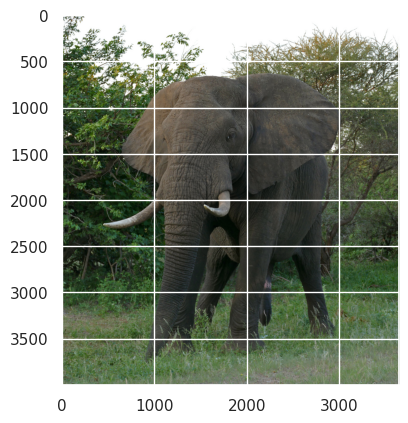

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
#!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

In [ ]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Prediction [('n02504458', 'African_elephant', 0.9014321), ('n01871265', 'tusker', 0.08966371), ('n02504013', 'Indian_elephant', 0.008881179)]
